# Test 12 {#sec-test_12}
The circuit in @fig-test_12 is a 7th order low pass filter, Chebyshev response, 0.1 dB of ripple from @Zverev1967. This test circuit is a ladder filter realization of a Chebyshev filter. 

![test circuit](test_12.png){#fig-test_12}

The netlist generated by LTSpice:
```
* test_12_v1.asc
C3 2 0 3.7642
I1 0 1 AC 1
C5 3 0 4.015
C7 4 0 3.0182 Rser=0
L2 1 2 0.7529 Rser=0
L4 2 3 0.9276 Rser=0
L6 3 4 0.9142 Rser=0
Rs 1 0 0.5
Rl 4 0 1
C1 1 0 1.5948
;op
.ac list 0.159154943091895
* ;.ac dec 100 0.01 1
.backanno
.end
```

In [69]:
#import os
from sympy import *
import numpy as np
from tabulate import tabulate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

## Load the net list

In [70]:
net_list = '''
C3 2 0 3.7642
I1 0 1 1
C5 3 0 4.015
C7 4 0 3.0182
L2 1 2 0.7529
L4 2 3 0.9276
L6 3 4 0.9142
Rs 1 0 0.5
Rl 4 0 1
C1 1 0 1.5948

'''

## Call the symbolic modified nodal analysis function

In [71]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

Display the equations

In [72]:
# reform X and Z into Matrix type for printing
Xp = Matrix(X)
Zp = Matrix(Z)
temp = ''
for i in range(len(X)):
    temp += '${:s}$<br>'.format(latex(Eq((A*Xp)[i:i+1][0],Zp[i])))

Markdown(temp)

$I_{L2} + v_{1} \left(C_{1} s + \frac{1}{Rs}\right) = I_{1}$<br>$C_{3} s v_{2} - I_{L2} + I_{L4} = 0$<br>$C_{5} s v_{3} - I_{L4} + I_{L6} = 0$<br>$- I_{L6} + v_{4} \left(C_{7} s + \frac{1}{Rl}\right) = 0$<br>$- I_{L2} L_{2} s + v_{1} - v_{2} = 0$<br>$- I_{L4} L_{4} s + v_{2} - v_{3} = 0$<br>$- I_{L6} L_{6} s + v_{3} - v_{4} = 0$<br>

### Netlist statistics

In [73]:
print(report)

Net list report
number of lines in netlist: 10
number of branches: 10
number of nodes: 4
number of unknown currents: 3
number of RLC (passive components): 9
number of inductors: 3
number of independent voltage sources: 0
number of independent current sources: 1
number of op amps: 0
number of E - VCVS: 0
number of G - VCCS: 0
number of F - CCCS: 0
number of H - CCVS: 0
number of K - Coupled inductors: 0



### Connectivity Matrix

In [74]:
A

⎡       1                                             ⎤
⎢C₁⋅s + ──   0     0        0        1      0      0  ⎥
⎢       Rs                                            ⎥
⎢                                                     ⎥
⎢    0      C₃⋅s   0        0       -1      1      0  ⎥
⎢                                                     ⎥
⎢    0       0    C₅⋅s      0        0     -1      1  ⎥
⎢                                                     ⎥
⎢                              1                      ⎥
⎢    0       0     0    C₇⋅s + ──    0      0     -1  ⎥
⎢                              Rl                     ⎥
⎢                                                     ⎥
⎢    1       -1    0        0      -L₂⋅s    0      0  ⎥
⎢                                                     ⎥
⎢    0       1     -1       0        0    -L₄⋅s    0  ⎥
⎢                                                     ⎥
⎣    0       0     1       -1        0      0    -L₆⋅s⎦

### Unknown voltages and currents

In [75]:
X

### Known voltages and currents

In [76]:
Z

### Network dataframe

In [77]:
network_df

,element,p node,n node,cp node,cn node,Vout,value,Vname,Lname1,Lname2
0,C3,2,0,NaN,NaN,NaN,3.7642,NaN,NaN,NaN
1,I1,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,C5,3,0,NaN,NaN,NaN,4.015,NaN,NaN,NaN
3,C7,4,0,NaN,NaN,NaN,3.0182,NaN,NaN,NaN
4,L2,1,2,NaN,NaN,NaN,0.7529,NaN,NaN,NaN
5,L4,2,3,NaN,NaN,NaN,0.9276,NaN,NaN,NaN
6,L6,3,4,NaN,NaN,NaN,0.9142,NaN,NaN,NaN
7,Rs,1,0,NaN,NaN,NaN,0.5,NaN,NaN,NaN
8,Rl,4,0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
9,C1,1,0,NaN,NaN,NaN,1.5948,NaN,NaN,NaN


### Unknown current dataframe

In [78]:
i_unk_df

,element,p node,n node
0,L2,1,2
1,L4,2,3
2,L6,3,4


### Build the network equation matrix

In [79]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)
NE_sym

⎡          ⎛       1 ⎞ ⎤       
⎢I_L2 + v₁⋅⎜C₁⋅s + ──⎟ ⎥       
⎢          ⎝       Rs⎠ ⎥   ⎡I₁⎤
⎢                      ⎥   ⎢  ⎥
⎢C₃⋅s⋅v₂ - I_L2 + I_L4 ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢C₅⋅s⋅v₃ - I_L4 + I_L6 ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢           ⎛       1 ⎞⎥ = ⎢0 ⎥
⎢-I_L6 + v₄⋅⎜C₇⋅s + ──⎟⎥   ⎢  ⎥
⎢           ⎝       Rl⎠⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢ -I_L2⋅L₂⋅s + v₁ - v₂ ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢ -I_L4⋅L₄⋅s + v₂ - v₃ ⎥   ⎣0 ⎦
⎢                      ⎥       
⎣ -I_L6⋅L₆⋅s + v₃ - v₄ ⎦       

In [80]:
# turn the free symbols into SymPy variables
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

## Symbolic solution

In [81]:
U_sym = solve(NE_sym,X)

Display the symbolic solution

In [82]:
temp = ''
for i in U_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_sym[i]))

Markdown(temp)

$v_{1} = \frac{C_{3} C_{5} C_{7} I_{1} L_{2} L_{4} L_{6} Rl Rs s^{6} + C_{3} C_{5} I_{1} L_{2} L_{4} L_{6} Rs s^{5} + C_{3} C_{5} I_{1} L_{2} L_{4} Rl Rs s^{4} + C_{3} C_{7} I_{1} L_{2} L_{4} Rl Rs s^{4} + C_{3} C_{7} I_{1} L_{2} L_{6} Rl Rs s^{4} + C_{3} I_{1} L_{2} L_{4} Rs s^{3} + C_{3} I_{1} L_{2} L_{6} Rs s^{3} + C_{3} I_{1} L_{2} Rl Rs s^{2} + C_{5} C_{7} I_{1} L_{2} L_{6} Rl Rs s^{4} + C_{5} C_{7} I_{1} L_{4} L_{6} Rl Rs s^{4} + C_{5} I_{1} L_{2} L_{6} Rs s^{3} + C_{5} I_{1} L_{2} Rl Rs s^{2} + C_{5} I_{1} L_{4} L_{6} Rs s^{3} + C_{5} I_{1} L_{4} Rl Rs s^{2} + C_{7} I_{1} L_{2} Rl Rs s^{2} + C_{7} I_{1} L_{4} Rl Rs s^{2} + C_{7} I_{1} L_{6} Rl Rs s^{2} + I_{1} L_{2} Rs s + I_{1} L_{4} Rs s + I_{1} L_{6} Rs s + I_{1} Rl Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>$v_{2} = \frac{C_{5} C_{7} I_{1} L_{4} L_{6} Rl Rs s^{4} + C_{5} I_{1} L_{4} L_{6} Rs s^{3} + C_{5} I_{1} L_{4} Rl Rs s^{2} + C_{7} I_{1} L_{4} Rl Rs s^{2} + C_{7} I_{1} L_{6} Rl Rs s^{2} + I_{1} L_{4} Rs s + I_{1} L_{6} Rs s + I_{1} Rl Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>$v_{3} = \frac{C_{7} I_{1} L_{6} Rl Rs s^{2} + I_{1} L_{6} Rs s + I_{1} Rl Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>$v_{4} = \frac{I_{1} Rl Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>$I_{L2} = \frac{C_{3} C_{5} C_{7} I_{1} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} I_{1} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} I_{1} L_{4} Rl Rs s^{3} + C_{3} C_{7} I_{1} L_{4} Rl Rs s^{3} + C_{3} C_{7} I_{1} L_{6} Rl Rs s^{3} + C_{3} I_{1} L_{4} Rs s^{2} + C_{3} I_{1} L_{6} Rs s^{2} + C_{3} I_{1} Rl Rs s + C_{5} C_{7} I_{1} L_{6} Rl Rs s^{3} + C_{5} I_{1} L_{6} Rs s^{2} + C_{5} I_{1} Rl Rs s + C_{7} I_{1} Rl Rs s + I_{1} Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>$I_{L4} = \frac{C_{5} C_{7} I_{1} L_{6} Rl Rs s^{3} + C_{5} I_{1} L_{6} Rs s^{2} + C_{5} I_{1} Rl Rs s + C_{7} I_{1} Rl Rs s + I_{1} Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>$I_{L6} = \frac{C_{7} I_{1} Rl Rs s + I_{1} Rs}{C_{1} C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl Rs s^{7} + C_{1} C_{3} C_{5} L_{2} L_{4} L_{6} Rs s^{6} + C_{1} C_{3} C_{5} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{4} Rl Rs s^{5} + C_{1} C_{3} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{3} L_{2} L_{4} Rs s^{4} + C_{1} C_{3} L_{2} L_{6} Rs s^{4} + C_{1} C_{3} L_{2} Rl Rs s^{3} + C_{1} C_{5} C_{7} L_{2} L_{6} Rl Rs s^{5} + C_{1} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{1} C_{5} L_{2} L_{6} Rs s^{4} + C_{1} C_{5} L_{2} Rl Rs s^{3} + C_{1} C_{5} L_{4} L_{6} Rs s^{4} + C_{1} C_{5} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{2} Rl Rs s^{3} + C_{1} C_{7} L_{4} Rl Rs s^{3} + C_{1} C_{7} L_{6} Rl Rs s^{3} + C_{1} L_{2} Rs s^{2} + C_{1} L_{4} Rs s^{2} + C_{1} L_{6} Rs s^{2} + C_{1} Rl Rs s + C_{3} C_{5} C_{7} L_{2} L_{4} L_{6} Rl s^{6} + C_{3} C_{5} C_{7} L_{4} L_{6} Rl Rs s^{5} + C_{3} C_{5} L_{2} L_{4} L_{6} s^{5} + C_{3} C_{5} L_{2} L_{4} Rl s^{4} + C_{3} C_{5} L_{4} L_{6} Rs s^{4} + C_{3} C_{5} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{2} L_{4} Rl s^{4} + C_{3} C_{7} L_{2} L_{6} Rl s^{4} + C_{3} C_{7} L_{4} Rl Rs s^{3} + C_{3} C_{7} L_{6} Rl Rs s^{3} + C_{3} L_{2} L_{4} s^{3} + C_{3} L_{2} L_{6} s^{3} + C_{3} L_{2} Rl s^{2} + C_{3} L_{4} Rs s^{2} + C_{3} L_{6} Rs s^{2} + C_{3} Rl Rs s + C_{5} C_{7} L_{2} L_{6} Rl s^{4} + C_{5} C_{7} L_{4} L_{6} Rl s^{4} + C_{5} C_{7} L_{6} Rl Rs s^{3} + C_{5} L_{2} L_{6} s^{3} + C_{5} L_{2} Rl s^{2} + C_{5} L_{4} L_{6} s^{3} + C_{5} L_{4} Rl s^{2} + C_{5} L_{6} Rs s^{2} + C_{5} Rl Rs s + C_{7} L_{2} Rl s^{2} + C_{7} L_{4} Rl s^{2} + C_{7} L_{6} Rl s^{2} + C_{7} Rl Rs s + L_{2} s + L_{4} s + L_{6} s + Rl + Rs}$<br>

## Construct a dictionary of element values

In [83]:
element_value_keys = []
element_value_values = []

for i in range(len(network_df)):
    if network_df.iloc[i]['element'][0] == 'F' or network_df.iloc[i]['element'][0] == 'E' or network_df.iloc[i]['element'][0] == 'G' or network_df.iloc[i]['element'][0] == 'H':
        element_value_keys.append(var(network_df.iloc[i]['element'].lower()))
        element_value_values.append(network_df.iloc[i]['value'])
    else:
        element_value_keys.append(var(network_df.iloc[i]['element']))
        element_value_values.append(network_df.iloc[i]['value'])

element_values = dict(zip(element_value_keys, element_value_values))

In [84]:
element_values

## DC operating point

In [85]:
NE = NE_sym.subs(element_values)
NE_dc = NE.subs({s:0})
NE_dc

⎡I_L2 + 2.0⋅v₁ ⎤   ⎡1.0⎤
⎢              ⎥   ⎢   ⎥
⎢ -I_L2 + I_L4 ⎥   ⎢ 0 ⎥
⎢              ⎥   ⎢   ⎥
⎢ -I_L4 + I_L6 ⎥   ⎢ 0 ⎥
⎢              ⎥   ⎢   ⎥
⎢-I_L6 + 1.0⋅v₄⎥ = ⎢ 0 ⎥
⎢              ⎥   ⎢   ⎥
⎢   v₁ - v₂    ⎥   ⎢ 0 ⎥
⎢              ⎥   ⎢   ⎥
⎢   v₂ - v₃    ⎥   ⎢ 0 ⎥
⎢              ⎥   ⎢   ⎥
⎣   v₃ - v₄    ⎦   ⎣ 0 ⎦

In [86]:
U_dc = solve(NE_dc,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [87]:
table_header = ['unknown', 'mag']
table_row = []

for name, value in U_dc.items():
    table_row.append([str(name),float(value)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal'),tablefmt="simple",floatfmt=('5s','.6f')))

unknown         mag
---------  --------
v1         0.333333
v2         0.333333
v3         0.333333
v4         0.333333
I_L2       0.333333
I_L4       0.333333
I_L6       0.333333


The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
```
       --- Operating Point ---

V(2):	 0.333333	 voltage
V(1):	 0.333333	 voltage
V(3):	 0.333333	 voltage
V(4):	 0.333333	 voltage
I(C3):	 1.25473e-12	 device_current
I(C5):	 1.33833e-12	 device_current
I(C7):	 1.00607e-12	 device_current
I(C1):	 5.316e-13	 device_current
I(L2):	 0.333333	 device_current
I(L4):	 0.333333	 device_current
I(L6):	 0.333333	 device_current
I(I1):	 1	 device_current
I(Rs):	 0.666667	 device_current
I(Rl):	 0.333333	 device_current
```
The results from LTSpice are slightly different in some cases starting at the 2nd decimal place.

### AC analysis
Solve equations for $\omega$ equal to 1 radian per second, s = 1j.
V1 is the AC source, magnitude of 10



In [88]:
NE = NE_sym.subs(element_values)
NE_w1 = NE.subs({s:1j})
NE_w1  # display the equations

⎡I_L2 + v₁⋅(2.0 + 1.5948⋅ⅈ) ⎤   ⎡1.0⎤
⎢                           ⎥   ⎢   ⎥
⎢-I_L2 + I_L4 + 3.7642⋅ⅈ⋅v₂ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -I_L4 + I_L6 + 4.015⋅ⅈ⋅v₃ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢-I_L6 + v₄⋅(1.0 + 3.0182⋅ⅈ)⎥ = ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.7529⋅ⅈ⋅I_L2 + v₁ - v₂  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.9276⋅ⅈ⋅I_L4 + v₂ - v₃  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎣ -0.9142⋅ⅈ⋅I_L6 + v₃ - v₄  ⎦   ⎣ 0 ⎦

In [89]:
U_w1 = solve(NE_w1,X)

Display the numerical solution

Six significant digits are displayed so that results can be compared to LTSpice. 

In [90]:
table_header = ['unknown', 'mag','phase, deg']
table_row = []

for name, value in U_w1.items():
    table_row.append([str(name),float(abs(value)),float(arg(value)*180/np.pi)])

print(tabulate(table_row, headers=table_header,colalign = ('left','decimal','decimal'),tablefmt="simple",floatfmt=('5s','.6f','.6f')))

unknown         mag    phase, deg
---------  --------  ------------
v1         0.247674     43.979099
v2         0.596900   -119.590485
v3         0.467235     71.054634
v4         0.235668    -81.486420
I_L2       1.112227    -34.389344
I_L4       1.142319    155.081675
I_L6       0.749319     -9.817657



```
       --- AC Analysis ---

frequency:	0.159155	Hz
V(2):	mag:     0.5969 phase:    -119.59° 	voltage
V(1):	mag:   0.247674 phase:    43.9791° 	voltage
V(3):	mag:   0.467235 phase:    71.0546° 	voltage
V(4):	mag:   0.235668 phase:   -81.4864° 	voltage
I(C3):	mag:    2.24685 phase:   -29.5905° 	device_current
I(C5):	mag:    1.87595 phase:    161.055° 	device_current
I(C7):	mag:   0.711294 phase:    8.51358° 	device_current
I(C1):	mag:   0.394991 phase:    133.979° 	device_current
I(L2):	mag:    1.11223 phase:   -34.3893° 	device_current
I(L4):	mag:    1.14232 phase:    155.082° 	device_current
I(L6):	mag:   0.749319 phase:   -9.81766° 	device_current
I(I1):	mag:          1 phase:          0° 	device_current
I(Rs):	mag:   0.495349 phase:    43.9791° 	device_current
I(Rl):	mag:   0.235668 phase:   -81.4864° 	device_current

```

### AC Sweep
Looking at node 4 voltage and comparing the results with those obtained from LTSpice. The frequency sweep is from 0.01 Hz to 1 Hz.

In [91]:
NE = NE_sym.subs(element_values)
NE

⎡I_L2 + v₁⋅(1.5948⋅s + 2.0) ⎤   ⎡1.0⎤
⎢                           ⎥   ⎢   ⎥
⎢-I_L2 + I_L4 + 3.7642⋅s⋅v₂ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -I_L4 + I_L6 + 4.015⋅s⋅v₃ ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢-I_L6 + v₄⋅(3.0182⋅s + 1.0)⎥ = ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.7529⋅I_L2⋅s + v₁ - v₂  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎢ -0.9276⋅I_L4⋅s + v₂ - v₃  ⎥   ⎢ 0 ⎥
⎢                           ⎥   ⎢   ⎥
⎣ -0.9142⋅I_L6⋅s + v₃ - v₄  ⎦   ⎣ 0 ⎦

In [92]:
U_ac = solve(NE,X)

### Plot the voltage at node 2

In [93]:
H = U_ac[v4]

In [94]:
num, denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(num, s).all_coeffs(), dtype=float)
b = np.array(Poly(denom, s).all_coeffs(), dtype=float)
system = (a, b)

In [95]:
#x = np.linspace(0.01*2*np.pi, 1*2*np.pi, 2000, endpoint=True)
x = np.logspace(-2, 0, 200, endpoint=False)*2*np.pi
w, mag, phase = signal.bode(system, w=x) # returns: rad/s, mag in dB, phase in deg

Load the csv file of node 10 voltage over the sweep range and plot along with the results obtained from SymPy.

In [96]:
fn = 'test_12_v1.csv' # data from LTSpice
LTSpice_data = np.genfromtxt(fn, delimiter=',')

In [97]:
# initaliaze some empty arrays
frequency = np.zeros(len(LTSpice_data))
voltage = np.zeros(len(LTSpice_data)).astype(complex)

# convert the csv data to complez numbers and store in the array
for i in range(len(LTSpice_data)):
    frequency[i] = LTSpice_data[i][0]
    voltage[i] = LTSpice_data[i][1] + LTSpice_data[i][2]*1j

Plot the results.  
Using

> np.unwrap(2 * phase) / 2) 

to keep the pahse plots the same.

In [98]:
frequency[0]

In [99]:
frequency[-1]

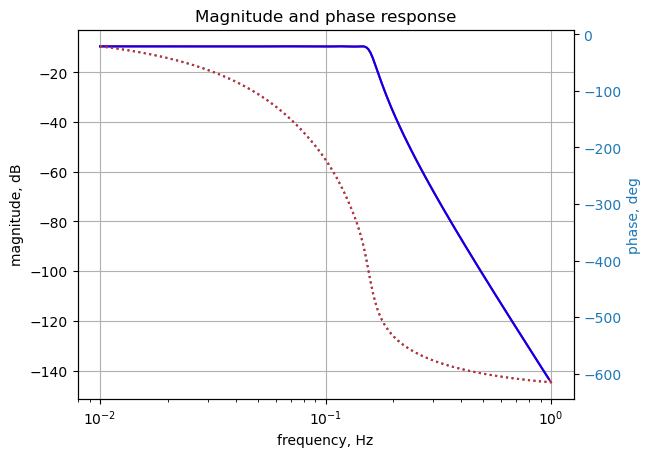

In [100]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency, 20*np.log10(np.abs(voltage)),'-r')    # Bode magnitude plot
plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency, np.unwrap(2*np.angle(voltage)/2)*180/np.pi,':',color=color)  # Bode phase plot
plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

The SymPy and LTSpice results overlay each other. 

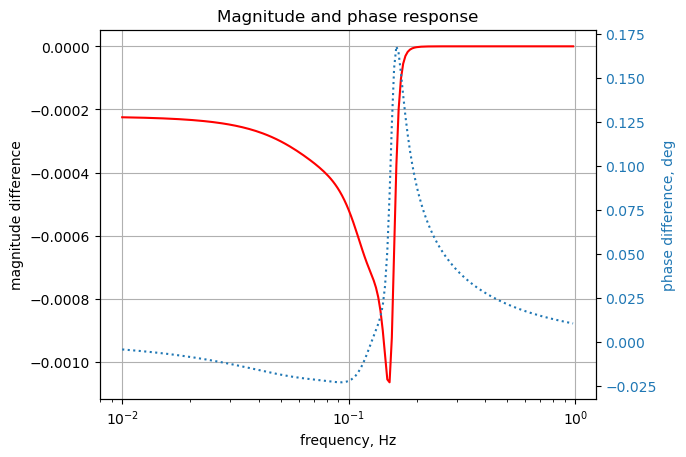

In [101]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(frequency[0:-1], np.abs(voltage[0:-1]) - 10**(mag/20),'-r')    # Bode magnitude plot
#plt.semilogx(w/(2*np.pi), mag,'-b')    # Bode magnitude plot

ax1.tick_params(axis='y')
#ax1.set_ylim((-30,20))
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(frequency[0:-1], np.unwrap(2*np.angle(voltage[0:-1])/2)*180/np.pi - phase,':',color=color)  # Bode phase plot
#plt.semilogx(w/(2*np.pi), phase,':',color='tab:red')  # Bode phase plot

ax2.set_ylabel('phase difference, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim((-5,25))

plt.title('Magnitude and phase response')
plt.show()

## Poles and zeros of the transfer function
The poles and zeros of the transfer function can easly be obtained with the following code:

In [102]:
H_num, H_denom = fraction(H) #returns numerator and denominator

# convert symbolic to numpy polynomial
a = np.array(Poly(H_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(H_denom, s).all_coeffs(), dtype=float)
sys = signal.TransferFunction(a,b)

In [103]:
sys_zeros = np.roots(sys.num)
sys_poles = np.roots(sys.den)

#### Low pass filter pole zero plot
The poles and zeros of the preamp transfer function are plotted.

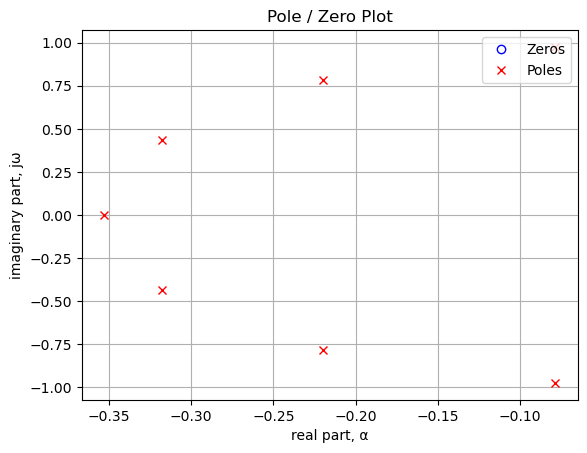

In [104]:
plt.plot(np.real(sys_zeros), np.imag(sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(sys_poles), np.imag(sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=1)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [105]:
print('number of zeros: {:d}'.format(len(sys_zeros)))
for i in sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 0


In [106]:
print('number of poles: {:d}'.format(len(sys_poles)))
for i in sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 7
-0.01+0.16j Hz
-0.01-0.16j Hz
-0.04+0.12j Hz
-0.04-0.12j Hz
-0.05+0.07j Hz
-0.05-0.07j Hz
-0.06+0.00j Hz


## Impulse and step response
Use the SciPy functions [impulse2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse2.html) and [step2](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step2.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

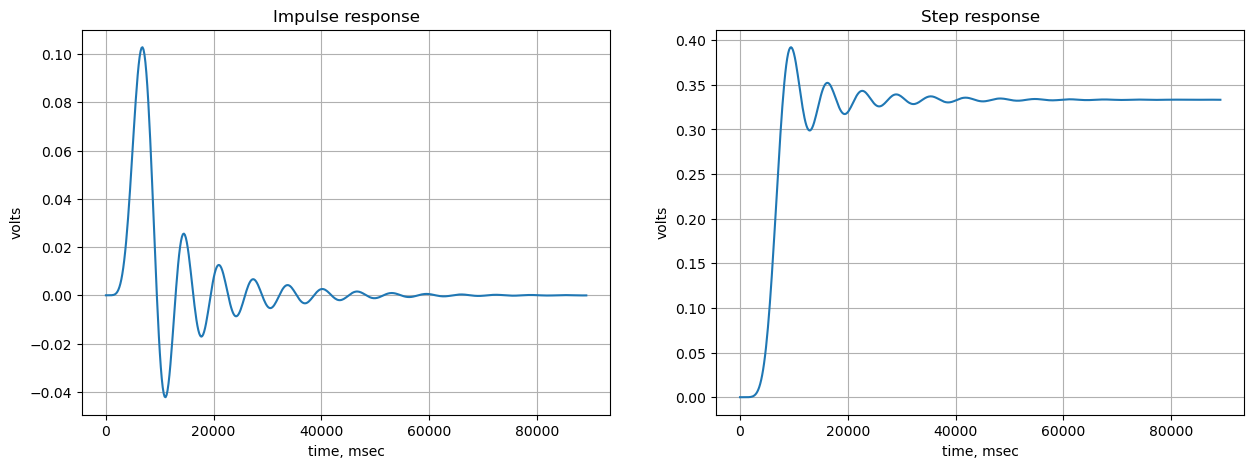

In [107]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step2(sys,N=500)
plt.plot(t/1e-3, y)
plt.title('Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# show plot
plt.show()

### Low pass filter group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

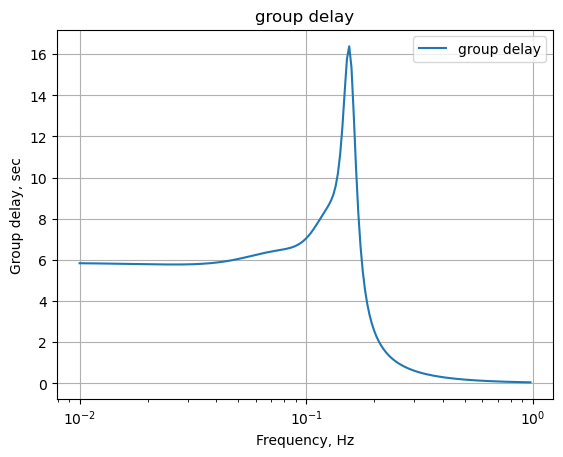

In [108]:
#w_preamp, mag_preamp, phase_preamp = bp_sys.bode(w=x_axis_range)

plt.title('group delay')
plt.semilogx(w/(2*np.pi), -np.gradient(phase*np.pi/180)/np.gradient(w),'-',label='group delay')

plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()